# Feedback Prize Competition

## Setup

In [1]:
## install the necessary libbraries
# !pip install -qq transformers
# !pip install -qq datasets
# !pip install -qq torch

In [2]:
%config Completer.use_jedi = False

## Load Data

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/feedback-prize-english-language-learning/sample_submission.csv
/kaggle/input/feedback-prize-english-language-learning/train.csv
/kaggle/input/feedback-prize-english-language-learning/test.csv


In [4]:
train = pd.read_csv('../input/feedback-prize-english-language-learning/train.csv')
test = pd.read_csv('../input/feedback-prize-english-language-learning/test.csv')
ss = pd.read_csv('../input/feedback-prize-english-language-learning/sample_submission.csv')

In [5]:
train.head()

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5


## EDA

In [6]:
# create a copy of train data for eda
train_eda = train.copy()

In [7]:
# inspect the shape of the data files
print(f'The train set has a shape of {train_eda.shape}\nTest set has a shape of {test.shape}')

The train set has a shape of (3911, 8)
Test set has a shape of (3, 2)


In [8]:
# inspect data types and missing values
train_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3911 entries, 0 to 3910
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   text_id      3911 non-null   object 
 1   full_text    3911 non-null   object 
 2   cohesion     3911 non-null   float64
 3   syntax       3911 non-null   float64
 4   vocabulary   3911 non-null   float64
 5   phraseology  3911 non-null   float64
 6   grammar      3911 non-null   float64
 7   conventions  3911 non-null   float64
dtypes: float64(6), object(2)
memory usage: 244.6+ KB


In [9]:
# check for duplicates
train_eda.duplicated().sum()

0

In [10]:
#  data types descriptions
train_eda.describe()

,cohesion,syntax,vocabulary,phraseology,grammar,conventions
count,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000
mean,3.127077,3.028254,3.235745,3.116850,3.032856,3.081053
std,0.662542,0.644399,0.583148,0.655997,0.699841,0.671450
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.500000,2.500000,3.000000,2.500000,2.500000,2.500000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3.500000,3.500000,3.500000,3.500000,3.500000,3.500000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


<Figure size 720x720 with 0 Axes>

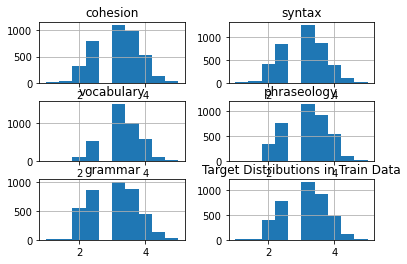

In [11]:
# target value distributions
plt.figure(figsize = (10,10))
train_eda.hist()
plt.title('Target Distributions in Train Data')
plt.show()

In [12]:
# correlation()
train_eda.corr()

,cohesion,syntax,vocabulary,phraseology,grammar,conventions
cohesion,1.000000,0.695459,0.666151,0.690058,0.638689,0.666151
syntax,0.695459,1.000000,0.680562,0.725467,0.709525,0.700025
vocabulary,0.666151,0.680562,1.000000,0.735261,0.654852,0.664292
phraseology,0.690058,0.725467,0.735261,1.000000,0.719746,0.666842
grammar,0.638689,0.709525,0.654852,0.719746,1.000000,0.673301
conventions,0.666151,0.700025,0.664292,0.666842,0.673301,1.000000


In [13]:
# word distribution in train data
train_eda['word_count'] = train_eda['full_text'].map(lambda x: len(x))
train_eda.head()

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions,word_count
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0,1387
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5,2635
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5,1663
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0,3973
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5,1326


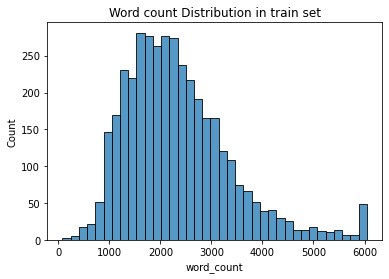

In [14]:
# see word count distribution
sns.histplot(data = train_eda,x = 'word_count',)
plt.title('Word count Distribution in train set')
plt.show()

In [15]:
print(f'The least word essay in train set has {train_eda.word_count.min()} words\nwhile the maximum word essay has {train_eda.word_count.max()} words')

The least word essay in train set has 82 words
while the maximum word essay has 6044 words


In [16]:
# check corr again
train_eda.corr()

,cohesion,syntax,vocabulary,phraseology,grammar,conventions,word_count
cohesion,1.000000,0.695459,0.666151,0.690058,0.638689,0.666151,0.236373
syntax,0.695459,1.000000,0.680562,0.725467,0.709525,0.700025,0.205633
vocabulary,0.666151,0.680562,1.000000,0.735261,0.654852,0.664292,0.281801
phraseology,0.690058,0.725467,0.735261,1.000000,0.719746,0.666842,0.224301
grammar,0.638689,0.709525,0.654852,0.719746,1.000000,0.673301,0.089115
conventions,0.666151,0.700025,0.664292,0.666842,0.673301,1.000000,0.161360
word_count,0.236373,0.205633,0.281801,0.224301,0.089115,0.161360,1.000000


### Insights from eda

* The target columns are strongly correlated with each other so it will be best to use a multi-output regression model instead predicting individually
* The essay lengths spans from 82 to 6044 words with the most within 1000-3000 word range
* There is little correlation between word length and target variables

## Data Preprocessing and Modelling

The data processing and modelling approaches will be based on using a transformer 

In [17]:
#  import the necessaray libraries
from transformers import AutoTokenizer, AutoModel, AutoConfig
from transformers import Trainer, TrainingArguments
from datasets import Dataset

from transformers.models.bert.modeling_bert import BertModel
from transformers.models.bert.modeling_bert import BertPreTrainedModel

import torch.nn as nn
import torch.nn.functional as F
import torch


from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
import gc

In [18]:
model_ckpt =  'bert-base-uncased'
save_dir = './outputs/'
N_FOLDS = 5
N_LABELS = 6
MAX_LENGHT = 512

In [19]:
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
config = AutoConfig.from_pretrained(model_ckpt)
base_model = AutoModel.from_pretrained(model_ckpt)

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [20]:
# save to disk for inference
tokenizer.save_pretrained(f'{save_dir}tokenizer.h5')
config.save_pretrained(f'{save_dir}config.h5')

In [21]:
# tokenize data
def tokenize_and_process(examples):
    text = examples['full_text']
#     seq_len = len(text)
#     seq_len = text_len if (text_len > tokenizer.model_max_length)  else tokenizer.model_max_length
    tokens = tokenizer(text, padding='max_length', max_length= MAX_LENGHT, truncation= True)
    if len(examples)> 3: # example comes from train ds
        tokens['labels'] = [examples[col] for col in target_cols]
#     tokens['seq_len'] = seq_len
    return tokens

In [23]:
target_cols = [col for col in list(train.columns)[2:]]
keep_cols = ['input_ids', 'attention_mask', 'labels'] # 'seq_len'
drop_cols = [col for col in train.columns if col not in keep_cols]

In [25]:
# use Kfold validation
kf = KFold(n_splits=5, shuffle= True, random_state=42)

In [26]:
def prepare_ds(train_df, val_df):
    '''Function converts train and validation dataframe to form required for modelling'''
    train_ds =  Dataset.from_pandas(train_df,preserve_index = False)
    val_ds = Dataset.from_pandas(val_df, preserve_index = False)
    train_ds = train_ds.map(tokenize_and_process)
    val_ds = val_ds.map(tokenize_and_process)
    encoded_train = train_ds.remove_columns(drop_cols)
    encoded_val = val_ds.remove_columns(drop_cols)
    encoded_train.set_format('torch')
    encoded_val.set_format('torch')
    return encoded_train, encoded_val

In [27]:
class MeanPooling(nn.Module):
    def __init__(self):
        super(MeanPooling, self).__init__()
        
    def forward(self, last_hidden_state, attention_mask):
        input_mask_expanded = attention_mask.unsqueeze(-1).expand(last_hidden_state.size()).float()
        sum_embeddings = torch.sum(last_hidden_state * input_mask_expanded, 1)
        sum_mask = input_mask_expanded.sum(1)
        sum_mask = torch.clamp(sum_mask, min=1e-9)
        mean_embeddings = sum_embeddings / sum_mask
        return mean_embeddings

class FeedBackModel(BertPreTrainedModel):
    
    def __init__(self, config):
        super().__init__(config)
        num_labels = config.num_labels
        self.bert =  BertModel(config)
        self.pool = MeanPooling()
#         self.drop = nn.Dropout(0.1)
        self.fc1 = nn.Linear(768, num_labels)
        self.embed = nn.Embedding(embedding_dim=768, num_embeddings=7000)
        
        self.init_weights()
#         self.bert.requires_grad_()
        
    def forward(self, input_ids = None, attention_mask = None, labels = None):
#         embed = self.embed(seq_len)
        z = self.bert(input_ids = input_ids, attention_mask = attention_mask)['last_hidden_state']
        outs = self.pool(z, attention_mask)
#         outs = outs + embed
        outs = self.fc1(outs)
        if labels != None:
            loss_fn = nn.MSELoss(reduction='mean')
            loss = loss_fn(outs, labels)
            return {'logits' : outs , 'loss' : loss}
        return {'logits' : outs}

In [28]:
config.num_labels = N_LABELS # add number of labels to model configuration file
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # initialize device

In [29]:
# custom trainer specifies the way to calculate loss for our model
class CustomTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.get("labels")
        # forward pass
        outputs = model(**inputs)
        logits = outputs.get("logits")
        # compute custom loss (suppose one has 3 labels with different weights)
        loss_fct = nn.MSELoss(reduction='mean')
        loss = loss_fct(logits, labels)
        return (loss, outputs) if return_outputs else loss

In [30]:
def compute_metrics(pred):
    '''Using competition metrics'''
    labels = pred.label_ids
    preds = pred.predictions
    mse = np.mean(np.square(labels- preds), axis = 0)
    rmse = np.sqrt(mse)
    mcrmse = np.mean(rmse, axis = 0)
    return {"mcrmse":  mcrmse}

In [31]:
# define trainging args
num_epochs = 4
batch_size = 8
logging_steps = (len(train)*0.8) // batch_size
model_name = f"{model_ckpt}-feedback_base"
training_args = TrainingArguments(output_dir=model_name, log_level="error", num_train_epochs=num_epochs,
                                  load_best_model_at_end = True,
                                  save_strategy='epoch',
                                  per_device_train_batch_size=batch_size,
                                  fp16 = False,learning_rate = 3e-5,
                                  per_device_eval_batch_size=batch_size, evaluation_strategy="epoch",
                                  save_steps=100, weight_decay=0.01, disable_tqdm=False,
                                  logging_steps=logging_steps, push_to_hub=False,report_to='none')

In [32]:
def model_init():
    return (FeedBackModel.from_pretrained(model_ckpt, config = config).to(device))

In [33]:
# cross validate across different data points
eval_scores = []

for fold, (train_index, test_index) in enumerate(kf.split(train)):
    
    print(f"====== FOLD RUNNING {fold + 1}======")
    
    train_k , val_k = train.iloc[train_index, :], train.iloc[test_index,:]
    train_ds, val_ds = prepare_ds(train_k, val_k)
    
    trainer = CustomTrainer(model_init= model_init, args=training_args,
                       compute_metrics=compute_metrics,
                       train_dataset=train_ds,
                       eval_dataset=val_ds,
                       tokenizer=tokenizer)
    
    trainer.train()
    
    score = trainer.evaluate(val_ds)['eval_mcrmse']
    
    trainer.model.save_pretrained(f'{save_dir}bert_model{fold + 1}.h5') # save best model for each step
    eval_scores.append(score)
    
    print(f'Evaluation scores after {fold + 1} folds -->{eval_scores}')
    
    del train_ds, val_ds, train_k, val_k
    gc.collect()
    torch.cuda.empty_cache()

====== FOLD RUNNING 1======


  0%|          | 0/3128 [00:00<?, ?ex/s]

  0%|          | 0/783 [00:00<?, ?ex/s]

/opt/conda/lib/python3.7/site-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch,Training Loss,Validation Loss,Mcrmse
1,0.418900,0.292006,0.538375
2,0.230500,0.248008,0.496858
3,0.180000,0.260510,0.509061
4,0.145100,0.272046,0.520813


Evaluation scores after 1 folds -->[0.4968580901622772]
====== FOLD RUNNING 2======


  0%|          | 0/3129 [00:00<?, ?ex/s]

  0%|          | 0/782 [00:00<?, ?ex/s]

/opt/conda/lib/python3.7/site-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch,Training Loss,Validation Loss,Mcrmse
1,0.424800,0.324861,0.566972
2,0.229200,0.399357,0.629185
3,0.175300,0.259616,0.508416
4,0.140900,0.283818,0.531102


Evaluation scores after 2 folds -->[0.4968580901622772, 0.5084158778190613]
====== FOLD RUNNING 3======


  0%|          | 0/3129 [00:00<?, ?ex/s]

  0%|          | 0/782 [00:00<?, ?ex/s]

/opt/conda/lib/python3.7/site-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch,Training Loss,Validation Loss,Mcrmse
1,0.447900,0.270803,0.519860
2,0.234700,0.234522,0.483694
3,0.182000,0.376077,0.610194
4,0.146200,0.287394,0.534712


Evaluation scores after 3 folds -->[0.4968580901622772, 0.5084158778190613, 0.4836938679218292]
====== FOLD RUNNING 4======


  0%|          | 0/3129 [00:00<?, ?ex/s]

  0%|          | 0/782 [00:00<?, ?ex/s]

/opt/conda/lib/python3.7/site-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch,Training Loss,Validation Loss,Mcrmse
1,0.408800,0.345082,0.583605
2,0.227900,0.271418,0.520344
3,0.176300,0.256819,0.505569
4,0.141700,0.275923,0.524309


Evaluation scores after 4 folds -->[0.4968580901622772, 0.5084158778190613, 0.4836938679218292, 0.505569338798523]
====== FOLD RUNNING 5======


  0%|          | 0/3129 [00:00<?, ?ex/s]

  0%|          | 0/782 [00:00<?, ?ex/s]

/opt/conda/lib/python3.7/site-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch,Training Loss,Validation Loss,Mcrmse
1,0.420300,0.277792,0.524696
2,0.227600,0.297347,0.541690
3,0.178300,0.275594,0.522837
4,0.141800,0.277852,0.524644


Evaluation scores after 5 folds -->[0.4968580901622772, 0.5084158778190613, 0.4836938679218292, 0.505569338798523, 0.5228366255760193]


## Making Prediction On Test Set

In [34]:
def prepare_test_ds(test_df):
    '''
    Function converts test dataframe to pytorch tensor for modelling
    
    inputs:
        test_df : pd.DataFrame
        
    outputs:
        encoded_test : Dataset
        test_ds : Dataset - used to extract test_ids
    
    '''
    test_ds = Dataset.from_pandas(test_df)
    tokenized_test = test_ds.map(tokenize_and_process)
    encoded_test =  tokenized_test.remove_columns(['full_text'])
    encoded_test.set_format('torch')
    return test_ds, encoded_test

In [35]:
test_ds, encode_test = prepare_test_ds(test)

# initialize datasets for trainer , wont be used
train_df, val_df = train_test_split(train, test_size = 0.2, random_state = 42)
encoded_train, encoded_val =  prepare_ds(train_df, val_df)

eval_tokenizer = AutoTokenizer.from_pretrained(f'{save_dir}tokenizer.h5') # used saved tokenizer

  0%|          | 0/3 [00:00<?, ?ex/s]

  0%|          | 0/3128 [00:00<?, ?ex/s]

  0%|          | 0/783 [00:00<?, ?ex/s]

In [36]:
for fold in range(5):
    
    print(f"====== FOLD RUNNING {fold}======")
    
    model = FeedBackModel.from_pretrained(f'{save_dir}bert_model{fold + 1}.h5', config = config).eval().to(device)
    
    trainer = CustomTrainer(model = model, args=training_args,
                       compute_metrics=compute_metrics,
                       train_dataset=encoded_train,
                       eval_dataset=encoded_val,
                       tokenizer=tokenizer)
    
    preds = trainer.predict(encode_test)[0]
    
    if fold == 0:
        final_preds = preds * (1/5)
    else:
        final_preds += preds * (1/5)

    del model
    gc.collect()
    torch.cuda.empty_cache()

====== FOLD RUNNING 0======


====== FOLD RUNNING 1======


====== FOLD RUNNING 2======


====== FOLD RUNNING 3======


====== FOLD RUNNING 4======


In [37]:
# create submission file
sub_dict = {}
sub_dict['text_id'] = test_ds['text_id']
for i, col in enumerate(target_cols):
    sub_dict[col] = final_preds[:, i]
sub_df = pd.DataFrame(sub_dict)
sub_df

,text_id,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,0000C359D63E,2.932452,2.767177,3.050929,2.883127,2.717170,2.771553
1,000BAD50D026,2.694888,2.504544,2.769678,2.491786,2.341357,2.728239
2,00367BB2546B,3.785535,3.685659,3.829267,3.762333,3.700413,3.857792


In [38]:
sub_df.to_csv('submission.csv', index = False)